## Importing modules to use data from Google Drive


In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 3.5MB/s 


## Authenticating User 

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



## Downloading file from Google Drive

In [0]:
fid = drive.ListFile({'q':"title='Mobile_dataset.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Mobile_dataset.zip')

## Unzipping the downloaded file 

In [0]:
!unzip Mobile_dataset.zip

In [5]:
# deleting corrupt images which interuppted training of model
import os,shutil

os.remove('Mobile_dataset/dog/dog1218.jpg')
shutil.copyfile('Mobile_dataset/dog/dog1217.jpg','Mobile_dataset/dog/dog1218.jpg')

os.remove('Mobile_dataset/quote/quote1017.jpg')
shutil.copyfile('Mobile_dataset/quote/quote1016.jpg','Mobile_dataset/quote/quote1017.jpg')

os.remove('Mobile_dataset/spam/spam1035.jpg')
shutil.copy('Mobile_dataset/spam/spam1034.jpg','Mobile_dataset/spam/spam1035.jpg')

'Mobile_dataset/spam/spam1035.jpg'

## Making Directories for Training, Validation and Testing the Model

In [0]:
import os,shutil 

original_dir='Mobile_dataset'         # original directory downloaded from google drive 
base_dir="data"                       # base directory where we will separate training, validation and testing data 

os.mkdir(base_dir)                    # making the base directory 

In [0]:
# Making the training directory 
train_dir=os.path.join(base_dir,"train")
os.mkdir(train_dir)

# Making the Validation directory 
validation_dir=os.path.join(base_dir,"validation")
os.mkdir(validation_dir)

# Making the test directory
test_dir=os.path.join(base_dir,"test")
os.mkdir(test_dir)


### Number of categories in the data 

In [8]:
categories=[i for i in os.listdir(original_dir)]   # list of categories in the data 

num_classes=len(categories)                        # number of categories in the data

print('Number of Classes : ',num_classes)
print('Categories : ',categories)

Number of Classes :  6
Categories :  ['screenshot', 'cat', 'george_bush', 'dog', 'quote', 'spam']


### Making Directories for each category in the training, validation and testing directory.

In [9]:
c=[]

# directories for training pictures 
for j in categories:
  c.append(os.path.join(train_dir,j))
  

# directories for validation pictures
for j in categories:
  c.append(os.path.join(validation_dir,j))
  

#directories for test pictures 
for j in categories:
  c.append(os.path.join(test_dir,j))
  

print(c)

for i in c:
  os.mkdir(i)   #making directories 

['data/train/screenshot', 'data/train/cat', 'data/train/george_bush', 'data/train/dog', 'data/train/quote', 'data/train/spam', 'data/validation/screenshot', 'data/validation/cat', 'data/validation/george_bush', 'data/validation/dog', 'data/validation/quote', 'data/validation/spam', 'data/test/screenshot', 'data/test/cat', 'data/test/george_bush', 'data/test/dog', 'data/test/quote', 'data/test/spam']


### Making list of training directories 

In [10]:
train_categories=[]
for i in categories:
  train_categories.append(base_dir+'/'+"train"+"/"+i)
  
print(train_categories)

['data/train/screenshot', 'data/train/cat', 'data/train/george_bush', 'data/train/dog', 'data/train/quote', 'data/train/spam']


### Making list of validation directories

In [11]:
validation_categories=[]
for i in categories:
  validation_categories.append(base_dir+'/'+"validation"+"/"+i)
  
print(validation_categories)

['data/validation/screenshot', 'data/validation/cat', 'data/validation/george_bush', 'data/validation/dog', 'data/validation/quote', 'data/validation/spam']


### Making list of testing directories

In [12]:
test_categories=[]
for i in categories:
  test_categories.append(base_dir+'/'+"test"+"/"+i)
  
print(test_categories)

['data/test/screenshot', 'data/test/cat', 'data/test/george_bush', 'data/test/dog', 'data/test/quote', 'data/test/spam']


### Making list of original directories

In [13]:
original_dataset=[]
for i in categories:
  original_dataset.append(original_dir+"/"+i)
  
print(original_dataset)

['Mobile_dataset/screenshot', 'Mobile_dataset/cat', 'Mobile_dataset/george_bush', 'Mobile_dataset/dog', 'Mobile_dataset/quote', 'Mobile_dataset/spam']


### Copying the first 1000 images of each category in training directory of each category.
### Copying the next 300 images of each category in validation directory of each category.
### Copying the 200 images of each category in testing directory of each category.

In [0]:
# Copy first 1000 images to train
for i,j in enumerate(categories):
  
  fnames = [x for x in os.listdir(original_dir+'/'+j)[1:1000]]

  for fname in fnames:
      src = os.path.join(original_dataset[i], fname)
      dst = os.path.join(train_categories[i], fname)
      shutil.copyfile(src, dst)
    

In [0]:
#Copy next 300 images for validation

for i,j in enumerate(categories):
  
  fnames = [x for x in os.listdir(original_dir+'/'+j)[1000:1300]]

  for fname in fnames:
      src = os.path.join(original_dataset[i], fname)
      dst = os.path.join(validation_categories[i], fname)
      shutil.copyfile(src, dst)
    

In [0]:
#Copy next 200 images for test

for i,j in enumerate(categories):
  
  fnames = [x for x in os.listdir(original_dir+'/'+j)[1300:1500]]

  for fname in fnames:
      src = os.path.join(original_dataset[i], fname)
      dst = os.path.join(test_categories[i], fname)
      shutil.copyfile(src, dst)

## Counting the total number of Training, Validation and Testing Images

In [17]:
# Total number of training images 
train_img_count=0
for i in os.listdir(base_dir+'/'+"train"):
  train_img_count+=len(os.listdir(base_dir+'/'+'train'+'/'+i))
  
# Total number of Validation Images 
validation_img_count=0
for i in os.listdir(base_dir+'/'+'validation'):
  validation_img_count+=len(os.listdir(base_dir+'/'+'validation'+'/'+i))
  
# Total number of Testing Images 
test_img_count=0
for i in os.listdir(base_dir+'/'+'test'):
  test_img_count+=len(os.listdir(base_dir+'/'+'test'+'/'+i))
  
print('Total Training Images :', train_img_count)
print('Total validation Images:', validation_img_count)
print('Total Test Images:', test_img_count)

Total Training Images : 5994
Total validation Images: 1800
Total Test Images: 1200


# Creating Model

### Importing required Modules 

In [18]:
import keras 
import numpy as np  

Using TensorFlow backend.


In [0]:
img_height = 250    
img_width = 250
BATCH_SIZE = 128

In [20]:
# Importing layers and models from keras
from keras import layers
from keras import models

model = models.Sequential()                                                     # Creating Sequential Model

model.add(layers.Conv2D(32, (3, 3), activation='relu',                          # Adding First Convolutional layer in the network
                        input_shape=(img_height,img_width, 3)))

model.add(layers.MaxPooling2D((2, 2)))                                          # adding First Pooling layer in the network

model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))          # Adding Second Convolutional layer in the network

model.add(layers.MaxPooling2D((2, 2)))                                          # Adding Second Pooling layer in the network

model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))          # Adding Third Convolutional layer in the network

model.add(layers.MaxPooling2D((2, 2)))                                          # Adding Third Pooling layer in the network

model.add(layers.Dropout(0.25))                                                 # Adding a Dropout layer 


model.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu'))         # Adding Fourth Convolutional layer in the network 

model.add(layers.MaxPooling2D((2, 2)))                                          # Adding Fourth Pooling layer in the network

model.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu'))         # Adding Fifth Convolutional Layer in the network

model.add(layers.MaxPooling2D((2, 2)))                                          # Adding Fifth Pooling layer in the network

model.add(layers.Dropout(0.25))                                                 # Adding a Dropout layer 


model.add(layers.Flatten())                                                     # Flattening the layers (Making it into one dimensional from 3 dimensional)
                                                             
model.add(layers.Dense(512, activation='relu'))                                 # Adding Dense Layer with 512 neurons

model.add(layers.Dense(256, activation='relu'))                                 # Adding Dense Layer with 256 neurons 

model.add(layers.Dense(num_classes, activation='softmax'))                      # Adding Output Dense Layer with softmax(gives probability of each output class)
                                                                                # activation function

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
# Summary of the Model 

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 62, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
__________

### Compiling Model 

In [0]:
model.compile(loss='categorical_crossentropy',                 
              optimizer='adam',
              metrics=['accuracy'])

### Processing Images before feeding into the Neural Network 

In [23]:
from keras.preprocessing.image import ImageDataGenerator


# Data Augumentation with training data 
train_datagen = ImageDataGenerator( rescale=1./255,                        # Normalizing Images, means all pixel values will be in the range (0,1) 
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

# Converting the data into Batches for easier processing 
train_generator = train_datagen.flow_from_directory(
                                train_dir,                                  # This is the target directory
                                target_size=(img_height, img_width),        # All images will be resized to (img_height x img_width) 
                                batch_size=BATCH_SIZE,
                                class_mode='categorical'                    # Since we use categorical_crossentropy loss, we need categorical labels
                                )


validation_generator = test_datagen.flow_from_directory(
                                validation_dir,
                                target_size=(img_height, img_width),
                                batch_size=BATCH_SIZE,
                                class_mode='categorical')

Found 5994 images belonging to 6 classes.
Found 1800 images belonging to 6 classes.


In [24]:
# Shape of the Batches formed 

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (128, 250, 250, 3)
labels batch shape: (128, 6)


## Training Model 

In [25]:
# Train the model
batch_size = BATCH_SIZE
train_steps_per_epoch = train_img_count // batch_size
val_steps_per_epoch = validation_img_count // batch_size

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=validation_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=10, 
                              shuffle=True,
                              verbose=1)   

Instructions for updating:
Use tf.cast instead.
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


46/46 [==============================] - 1133s 25s/step - loss: 1.5334 - acc: 0.3420 - val_loss: 1.3258 - val_acc: 0.4715
Epoch 2/10
46/46 [==============================] - 1102s 24s/step - loss: 1.0413 - acc: 0.5418 - val_loss: 1.1112 - val_acc: 0.5526
Epoch 3/10
46/46 [==============================] - 1088s 24s/step - loss: 0.8937 - acc: 0.6171 - val_loss: 0.8935 - val_acc: 0.6053
Epoch 4/10
46/46 [==============================] - 1087s 24s/step - loss: 0.8481 - acc: 0.6376 - val_loss: 0.8460 - val_acc: 0.6184
Epoch 5/10
46/46 [==============================] - 1084s 24s/step - loss: 0.7922 - acc: 0.6594 - val_loss: 0.6888 - val_acc: 0.7267
Epoch 6/10
46/46 [==============================] - 1090s 24s/step - loss: 0.7780 - acc: 0.6848 - val_loss: 0.7912 - val_acc: 0.6896
Epoch 7/10
46/46 [==============================] - 1087s 24s/step - loss: 0.7154 - acc: 0.7088 - val_loss: 0.7054 - val_acc: 0.7159
Epoch 8/10
46/46 [==============================] - 1093s 24s/step - loss: 0.667

In [0]:
model.save('mobile_dataset_project.h5')

### Plotting the training and validation loss, accuracy 

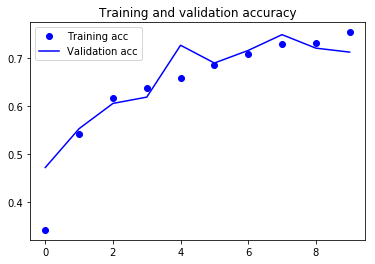

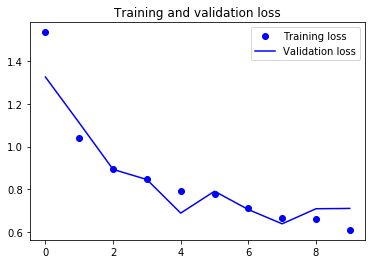

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Testing the Model 

In [28]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height,img_width),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test accuracy :', test_acc)
print('test loss :', test_loss)

Found 1200 images belonging to 6 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


test accuracy : 0.7125000003178914
test loss : 0.7208678099314372


##Confusion Matrix 

In [29]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height,img_width),
        batch_size=test_img_count,
        class_mode='categorical')

imgs,labels=next(test_generator)

y_true=[labels[i].argmax(axis=-1) for i in range(len(labels))]

predictions=model.predict(imgs)

y_pred =[ predictions[i].argmax(axis=-1) for i in range(len(predictions))]

class_names = np.asarray(categories)


Found 1200 images belonging to 6 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

cm = confusion_matrix(y_true,y_pred)
cm

array([[ 96,  76,   2,  17,   8,   1],
       [ 34, 128,   0,  24,  14,   0],
       [  0,   0, 200,   0,   0,   0],
       [  1,   3,   1, 168,  23,   4],
       [  0,   2,   0,  26, 171,   1],
       [  9,   7,   1,  87,   4,  92]])

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

   

Confusion matrix, without normalization


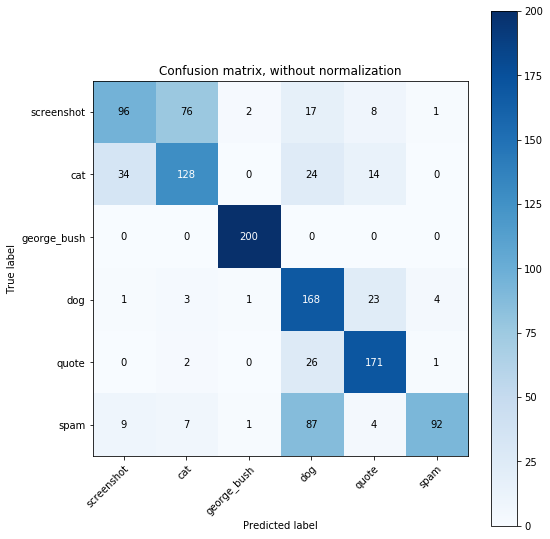

In [32]:
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')


Normalized confusion matrix


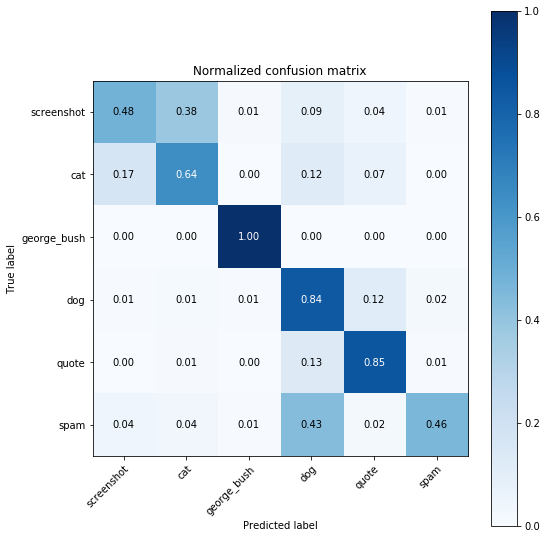

In [33]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

##Classification Report 

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred,target_names=class_names))

              precision    recall  f1-score   support

  screenshot       0.69      0.48      0.56       200
         cat       0.59      0.64      0.62       200
 george_bush       0.98      1.00      0.99       200
         dog       0.52      0.84      0.64       200
       quote       0.78      0.85      0.81       200
        spam       0.94      0.46      0.62       200

    accuracy                           0.71      1200
   macro avg       0.75      0.71      0.71      1200
weighted avg       0.75      0.71      0.71      1200

